In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_ta


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pytz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'usd', start = '2020-03-11',end = '2024-03-16')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,11.5300,11.7500,10.6875,10.9250,10.858279,218400
2020-03-12,9.8325,10.1325,8.3950,8.3950,8.343731,1046800
2020-03-13,9.3975,10.5350,8.6475,10.5350,10.470661,384800
2020-03-16,7.6250,9.3025,7.0000,7.0725,7.029307,407200
2020-03-17,7.3625,8.6375,6.9700,8.4425,8.390942,436800
2020-03-18,7.5975,7.9850,6.4050,7.2500,7.205722,334000
2020-03-19,7.1175,8.0000,6.6825,7.5100,7.464136,234400
2020-03-20,8.0000,8.2925,7.1150,7.1350,7.091425,376800
2020-03-23,7.3150,7.8875,7.0250,7.6950,7.648006,419200


In [5]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [6]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,21.625000,22.072500,21.492500,21.783819,68.191661,19.327984,16.413664,14.668300,-0.123978,0,21.871023
1,21.995001,22.207500,21.647499,21.871023,68.532086,19.577224,16.523195,14.764680,-0.548008,0,21.584492
2,22.132500,22.160000,21.447500,21.584492,66.043756,19.775345,16.624865,14.855976,0.429913,1,21.459913
3,21.030001,21.639999,20.850000,21.459913,64.945266,19.942693,16.722046,14.944407,-0.509556,0,21.302944
4,21.812500,21.815001,21.357500,21.302944,63.519002,20.079103,16.814183,15.029580,-0.673544,0,21.003956
5,21.677500,21.875000,20.895000,21.003956,60.794293,20.173951,16.898556,15.109652,-0.228672,0,21.041328
6,21.270000,21.387501,20.950001,21.041328,61.018235,20.263336,16.982000,15.189160,-0.534569,0,20.567932
7,21.102501,21.147499,20.637501,20.567932,56.628276,20.298971,17.054387,15.261323,-0.104568,0,20.567932
8,20.672501,20.815001,20.129999,20.567932,56.628276,20.331212,17.125339,15.332531,-0.165922,0,20.229078
9,20.395000,20.395000,19.870001,20.229078,53.467429,20.328001,17.188154,15.398292,-0.677704,0,19.277296


In [7]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.09796887 0.08840399 0.10717009 ... 0.6898475  0.         0.09876817]
 [0.10170777 0.08975063 0.10885779 ... 0.66664301 0.         0.09577657]
 [0.10309721 0.08927681 0.1066801  ... 0.7201584  1.         0.09447588]
 ...
 [0.87035164 0.88698252 0.90167684 ... 0.58061769 0.         0.89653248]
 [0.8939976  0.86972571 0.91256534 ... 0.53355531 0.         0.84923605]
 [0.85691192 0.84508729 0.87434668 ... 0.79896541 1.         0.8440157 ]]


In [9]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

861
[[[0.09796887 0.08840399 0.10717009 ... 0.0619433  0.         0.        ]
  [0.10170777 0.08975063 0.10885779 ... 0.0652195  0.00221292 0.0021804 ]
  [0.10309721 0.08927681 0.1066801  ... 0.06782377 0.004267   0.00424578]
  ...
  [0.10521929 0.09403991 0.11239656 ... 0.08411967 0.03673241 0.04159322]
  [0.10054566 0.09381546 0.10828615 ... 0.08611008 0.038482   0.04342048]
  [0.10784661 0.09603491 0.11511869 ... 0.08746965 0.04005592 0.04511792]]

 [[0.10170777 0.08975063 0.10885779 ... 0.0652195  0.00221292 0.0021804 ]
  [0.10309721 0.08927681 0.1066801  ... 0.06782377 0.004267   0.00424578]
  [0.09195635 0.08408977 0.10017423 ... 0.07002353 0.0062304  0.00624635]
  ...
  [0.10054566 0.09381546 0.10828615 ... 0.08611008 0.038482   0.04342048]
  [0.10784661 0.09603491 0.11511869 ... 0.08746965 0.04005592 0.04511792]
  [0.10716451 0.09780548 0.11577199 ... 0.08930376 0.04179171 0.04693745]]

 [[0.10309721 0.08927681 0.1066801  ... 0.06782377 0.004267   0.00424578]
  [0.09195635 0.08

In [10]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [11]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

664
(664, 30, 8)
(167, 30, 8)
(664, 1)
(167, 1)
[[0.10971996]
 [0.10987606]
 [0.11435042]
 [0.12249277]
 [0.12813773]
 [0.13081717]
 [0.13094725]
 [0.14411022]
 [0.14382406]
 [0.14496866]
 [0.13037492]
 [0.13019285]
 [0.12584855]
 [0.13271618]
 [0.13971389]
 [0.13960984]
 [0.14026019]
 [0.13625406]
 [0.13263814]
 [0.13185772]
 [0.1274733 ]
 [0.1302835 ]
 [0.1295549 ]
 [0.12929472]
 [0.13702272]
 [0.13954671]
 [0.13626814]
 [0.14714461]
 [0.14342372]
 [0.16426594]
 [0.16395371]
 [0.17004246]
 [0.17363325]
 [0.17623528]
 [0.18500411]
 [0.16980827]
 [0.18750205]
 [0.18823063]
 [0.20069434]
 [0.1882046 ]
 [0.18760614]
 [0.1788373 ]
 [0.14982471]
 [0.15859354]
 [0.15052726]
 [0.16975624]
 [0.18084087]
 [0.16991234]
 [0.17363325]
 [0.16861133]
 [0.18836075]
 [0.18560257]
 [0.1888551 ]
 [0.20855245]
 [0.21544782]
 [0.22062584]
 [0.20839633]
 [0.20181321]
 [0.21526569]
 [0.18908929]
 [0.18534237]
 [0.20532597]
 [0.16757053]
 [0.18008629]
 [0.19791017]
 [0.17907151]
 [0.15880172]
 [0.13405642]


In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0115 - val_loss: 7.1744e-04
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.8841e-04 - val_loss: 7.6909e-04
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.7653e-04 - val_loss: 8.2755e-04
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 5.6249e-04 - val_loss: 9.1556e-04
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.9982e-04 - val_loss: 7.7920e-04
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.2118e-04 - val_loss: 5.1186e-04
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.6256e-04 - val_loss: 5.0942e-04
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.2680e-04 - val_loss: 7.0716e-04
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.2679e-04 - val_loss: 9.2423e-04
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.7809e-04 - val_loss: 7.4807e-04
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.7746e-04 - 

In [13]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
[0.34159544] [0.36255706]
[0.35058215] [0.33020703]
[0.34879982] [0.32874601]
[0.3204898] [0.33083313]
[0.31405827] [0.34846912]
[0.31421965] [0.33584216]
[0.32797337] [0.34919961]
[0.32137907] [0.36777479]
[0.3328333] [0.370488]
[0.348226] [0.37174028]


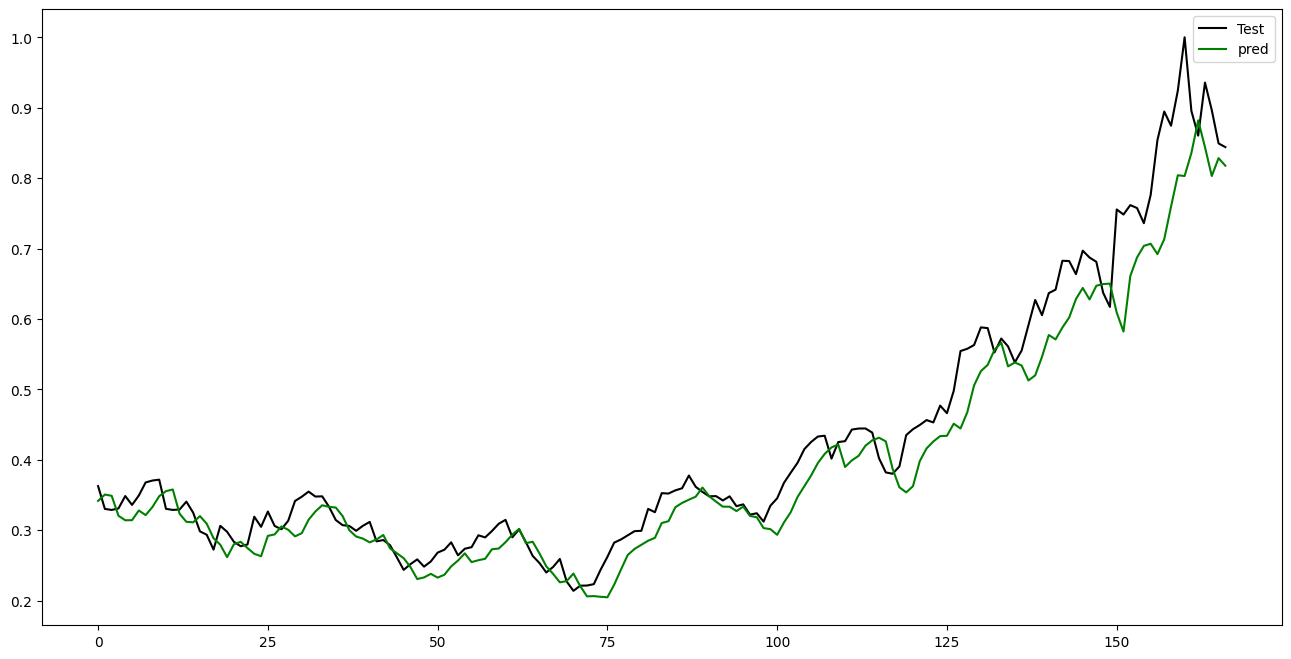

In [14]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()